##### Title: Substring matching with applications to genomics/proteomics
##### Authors: Aiman Al Masoud - Lotito Davide Pio
##### Date: Feb 21, 2022
<img src="./images/logoUnipvST.jpg" width="75" height="75">

In [10]:
# imports 
from matplotlib import pyplot as plt
import pandas as pd

# 0) Context
Our program operates in the context of searching for <em>Genes</em> within the <em>Genome</em> of a species. A Genome is the set of all of the genes of an organism. For most organisms, it is entirely made up of DNA (Deoxyribonucleic Acid): an extremely large molecule, that looks like a long twisted ladder. Below is a graphical representation of the the iconic DNA double helix. 

<img src="./images/dna1.png" width="300" height="300" style="display: block; margin-left: auto; margin-right: auto; width: 50%;">

It is an organic polymer that encodes the genetic information of an organism. It is itself made up of four different kinds of basic chemical building-blocks (nucleotides): **Adenine, Thymine, Cytosine**, and **Guanine**, conventionally represented by the letters: **A, T, C**, and **G**, respectively. Despite it being an organic molecule, the sequence of base-pairs can be conceptualized just like a huge string of computer-code, containing different combinations of the 4 characters: A, T, C, and G.

The order of the letters in this code matters, allowing DNA to function in different ways. Inside the DNA are genes, which are smaller sections (substrings) of DNA that code for specific traits. Some genes code for specific proteins and some do not.


### Eukaryotes vs Prokaryotes
An important distinction is made between **eukaryotic** cells and **prokaryotic** cells. Prokaryotes are single-celled organisms, with a primitive cellular structure and simplified vital functioning compared to more complex living things. An example of a Prokaryote is a bacterium, such as Escherichia coli. Typically they have a single circular chromosome (DNA). Eukaryotic cells are more complex, and have a DNA composed of one or more linear DNA chromosomes, an example of which is the human genome.

As our corpus, we picked the genomes of two bacteria and an insect (the honey bee):

* <em>Escherichia coli</em>: commonly found in the lower intestine of warm-blooded organisms, with a length of 5,000,000 nitrogenous base pairs.
* <em>Nostoc punctiforme</em>: with a length of about 9,000,000 nitrogenous base pairs
* <em>Apis mellifera</em>: most common species of honey bee worldwide, with a total length of about 236,000,000 nitrogenous base pairs (split into 16 chromosomes)

The genomes used for our analysis are all taken from the NCBI's website: <a href="https://www.ncbi.nlm.nih.gov/genbank/">https://www.ncbi.nlm.nih.gov/genbank/</a>.

* E. coli:
<a href="https://www.ncbi.nlm.nih.gov/data-hub/taxonomy/562/">https://www.ncbi.nlm.nih.gov/data-hub/taxonomy/562/</a>

* N. punctiforme:
<a href="https://www.ncbi.nlm.nih.gov/labs/data-hub/taxonomy/272131/">https://www.ncbi.nlm.nih.gov/labs/data-hub/taxonomy/272131/</a>

* A. mellifera:
<a href="https://www.ncbi.nlm.nih.gov/labs/data-hub/taxonomy/7460/">https://www.ncbi.nlm.nih.gov/labs/data-hub/taxonomy/7460/</a>



# 1) Analysis of the Serial Algorithm


## String Matching

The algorithms for the search of substrings called pattern-string (of length $M$), in a larger string called text-string (of length $N$) are of fundamental importance, and have applications in many different fields, including Genomics and Proteomics. 

## The Rabin-Karp Algorithm

The string-matching algorithm we chose to use for our project is the Rabin-Karp Algorithm.
The Rabin-Karp Algorithm makes use of a rolling-hash function that allows it to achieve performances in the order of $O(M + N)$, with high probability. This is a completely different approach to brute-force, as the search for substrings is based on hashing. 

### The operations can be roughly summarized in these few lines:
* Compute a hash function $h(P)$ for a given pattern $P$.
* Search for a match, using the same hash function for each possible substring of characters $M$ of the text.
* If you find a substring with the same hash value as the pattern, compare the characters one by one (Note: a matching hash does NOT imply a matching string).

## Role of the Rolling-Hash Function:

Be aware, however, that a direct implementation based on the above description would be much slower than a brute force search. Computing a hash function involving each character is probably much more expensive than just comparing the characters. But Rabin and Karp showed that it is easy to compute hash functions for character substrings M in constant time (after some preprocessing). This leads to a search for substrings in linear time (average performance) in the practical situations we have indicated. 

## How does the Hash work?

The underlying theory is the following: we know that a string of length M corresponds to a base-$R$ number of $M$ digits ($R$: alphabet size). If we want to use a hash table of size $Q$ for keys of this type, we need a hash function to convert any base-$R$ $M$-digit number to an int value between $0$ and $Q-1$. Modular hashing can be a good idea:

$hash (x) = x\;mod\;Q$

Basically, we use $Q$, a random prime number, as large as possible.

<img src="./images/image1.png" width="300" style="display: block; margin-left: auto; margin-right: auto; width: 50%;">

As already mentioned, Rabin-Karp does not compute hashing on all strings of length $M$, to find the one with the same hash and then make the comparison. But it makes use of a "mathematical trick" leveraged by Rabin and Karp.

This strategy leads, after some preprocessing, to compute hashes in constant time. The key to this strategy is Horner's rule: which states that it is possible to evaluate a polynomial of degree $N$ by carrying out exactly $N$ additions and $N$ multiplications. 


Example:

$ a_{2}* x^{2} + a_{1} * x + ... + a_{0} = (a^{2} * x + a_{1}) * x + a_{0} $


This identity holds true for *Modular Arithmetic*, the flavor of arithmetic used for hashing, where the following applies:


$ (a_{2} * x^{2} + a_{1} * x + ... + a_{0})\;mod\;z = (((a_{2} * x + a_{1})\;mod\;z) * x + a_{0})\;mod\;z $


The Rabin-Karp method is based on efficiently computing the hash function $x_{i+1}$ for the position $i+1$ in the text, given its value for position $i$, $x_{i}$. Example:

$ x_{i}= t_{i} * RM^{-1} + t_{i}+1 * RM^{-2} + ... + t_{i} + M^{-1} * R0 $
$ x_{i+1} = t_{i+1} * RM + t_{i} * RM^{-1} + ... + t_{i} + M * R0 $

$ x_{i+1} = (x_{i} - t_{i} * RM^{-1}) * R + t_{i}+M $

We do not have to keep the values ​​of the numbers, only the values ​​of their remainder divided by $Q$. The algorithm is then used iteratively, calculating the hash of the next string, using that of the previous one as in the formula above.

<img src="./images/image2.png" width="300" style="display: block; margin-left: auto; margin-right: auto; width: 50%;">


This algorithm is a first and famous example of a <em>Monte Carlo</em> algorithm, that has a guaranteed completion time, with a possibility for false positives, that can be made arbitrarily small. 

Once we find a hash value for a substring of text of characters M that matches the hash value of the pattern, we may or may not want to double-check by comparing each character. 

Double-checking requires each character of the string of text M to be matched against each character of the pattern, and this degrades the performance: since in the unfortunate event of frequent false-positives, it turns the issue at hand into an $O(M*N)$ problem, just like the brute-force algorithm. Picking an arbitrarily large value for $Q$, we can make the probability of a collision (false-positive) arbitrarily small. With a $Q$ value greater than $10^{20}$, we make the probability of a collision equal to $10^{-20}$.

However, in our implementation of the algorithm, we chose to doble-check the pattern against the substring each time their hashes match. This is due to the fact that using a very large value for $Q$ can lead to overflows, or slow down the execution. This also means that once a match is found by our program, it’s guaranteed to be a match.

Our implementation of the Rabin-Karp algorithm is as follows:


It is based on the C++ code found at the following GitHub repository:
<a href="https://github.com/avinashk442/String-matching-algorithms-and-applications">https://github.com/avinashk442/String-matching-algorithms-and-applications</a>

```
    int search(char txt[] ,char pat[])
    {
        int M = strlen(pat);
        int N = strlen(txt);
        int cou = 0;
        int i, j;   // indexs
        int p = 0; // hash value for pattern
        int t = 0; // hash value for txt
        int h = 1; 
    
        // The value of h would be "pow(R, M-1)%q"
        // use for : do not use external library for pow
        // use %Q : avoid overflow
        for (i = 0; i < M-1; i++)
            h = (h*R)%Q;
    
        // Calculate the hash value of pattern and first window of text 
        // inizialization
        for (i = 0; i < M; i++)
        {
            p = (R*p + pat[i])%Q;
            t = (R*t + txt[i])%Q;
        }
    
        // Slide the pattern over text one by one
        for (i = 0; i <= N - M; i++)
        {   
            // Check the hash values of current window of text and pattern. 
            // If the hash values match then only check for characters on by one
            if ( p == t )
            {
                // Check for characters one by one
                for (j = 0; j < M; j++)
                {
                    if (txt[i+j] != pat[j])
                        break;
                }
                // if p == t and pat[0...M-1] = txt[i, i+1, ...i+M-1]
                if (j == M)
                    cou++;
            }
    
            // Calculate hash value for next window of text: remove
            // leading digit, add trailing digit
            if ( i < N-M )
            {
                t = (R*(t - txt[i]*h) + txt[i+M])%Q;
                // We might get negative value of t, converting it to positive
                // Rabin-Karp algorithm assumes that the hashes result are always nonnegative
                if (t < 0)
                    t = (t + Q);
            }
        }
        return cou;
    }

```

# 2) A Priori Study of Available Parallelism

## The Problem

As aforementioned, the Rabin-Karb algorithm for string-matching uses a rolling-hash to avoid having to repeat the computation of the hash for each window of text from scratch, and to achieve linear time complecity in the best-case and common scenarios.

<img src="http://img.sparknotes.com/figures/E/e06912cfeeac4cade7d4527506538c17/rabin1.gif" width="300"></img>

This effectively means that there's always a data-dependency between the current iteration and the one preceding it. In particular, this is an instance of a  **loop-carried dependence**: *statements in an iteration of a loop depend on statements in another iteration of the loop*. The presence of this dependence makes it hard to parallelize the algorithm itself and we cannot use the loop-unrolling technique. 

## Our Solution

The approach we resorted to, was to split the text into $N$ parts (or $N$ "sub-texts"), where $N$ is the number of slave processes, and to assign a sub-text to each slave process. 

#### Role of the Master Process

The master process starts out by reading the full text and the pattern to be searched in it. It splits the text into $N$ parts of equal length, and sends each part to a slave, togheter with the pattern, which is the same for everyone. 

Then the master waits for each slave process to return its result, ie: the number of occurences found in a slave's sub-text. 

#### Role of the Slave Processes

A slave probes the size of the incoming message, using <em>MPI_Probe</em> and <em>MPI_Get_count</em>. It then allocates enough space in memory to store its assigned sub-text and the pattern to be searched for. 

The message from the master is a single string that includes both the sub-text and the pattern, separated by a designated char (that obviously can't appear in the text). 

The slave runs Rabin-Karp on the sub-text and the pattern, calling back the master when it is done searching, and returning its result.

#### Working Hypothesis

Assuming that the subtext is much larger than the pattern, we can neglect the remainder of the int division between text size and number of slaves. 

##### For example:

* $ N = 7 $ (Number of slave processes, using $N+1 =8$ total cores).
* $ M = 1000 $ (Size of the pattern).
* $ T = 1000000 $ (Size of the full text).

$ T\;mod\;N = 1 << M $       

Hence it's not worth it, or even possible, to search for a pattern of size $M$ in a portion the text of size $ T mod N $.

### Calculating $S$ and $P$ for the Amdahl-Law's Equation

Assuming that the ratio of C-slocs to Asm-slocs is approximately constant throughout the codebase.

$S$ : portion of serial (non-parallelizable) code 

$P$ : portion of parallelizable code.



### Lines of C/C++ Code:

In [11]:
def count_lines(pathname):
    """
    Counts significant lines of code in a C program without multiline comments.
    """
    import re
    with open(pathname, "r") as f:
        source = f.read()
    source = source.split("\n") 
    source = [line for line in source if len(line.strip()) > 0 ]
    source = [re.sub("\\s+", "", line) for line in source]
    source = [line for line in source if line[:2] != '//'  ]
    return len(source)

In [12]:
# the rabin-karp part and roughly half of the main (slave).
parallelizable = count_lines("../src/headers/rabin_karp.h") +count_lines("../src/parallel/main.cpp")/2

# total
total = parallelizable + count_lines("../src/parallel/main.cpp")/2 + count_lines("../src/headers/read_file.h")

P = parallelizable/total
S = 1-P
print("The percentage of serial code is:", round(S, 2))
print("The percentage of parallel code is:", round(P, 2))

The percentage of serial code is: 0.36
The percentage of parallel code is: 0.64


#### Applying Amdahl Law's Equation

In [13]:
speedup = lambda N, S, P : 1 / (S + P/N)

In [14]:
n_slaves = 3
f"With {n_slaves} slave cores, the expected speed-up is: {speedup(n_slaves, S, P)}"

'With 3 slave cores, the expected speed-up is: 1.7345971563981044'

### Plotting the expected curve
(From 1 to 12 slaves)

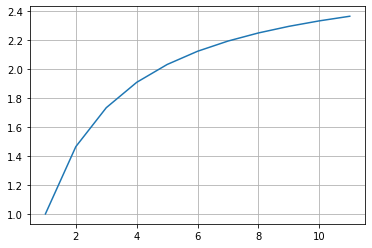

In [15]:
slaves = range(1,12)
plt.plot(slaves, list(map(lambda x: speedup(x, S, P), slaves)))
plt.grid()

### With Assembly slocs
(Assuming ratio of C-slocs/Asm-slocs is NOT constant throughout the codebase).

#### Decompiling the executable and counting the lines of code used by each part of the program:

In [16]:
! mpic++ -g -O0 -fno-builtin ../src/parallel/main.cpp -o a.out
! objdump -fsd --source a.out > dump.txt
! rm a.out
asm_code = ! cat dump.txt

##### Approx. Intervals from dump.txt (objump data):

In [17]:
dif = lambda a, b : abs(a-b) # distance between a and b 
master = dif( *[asm_code.index(x) for x in asm_code if "MASTER" in x])
slave = dif( *[asm_code.index(x) for x in asm_code if "SLAVE" in x])
search = dif( *[asm_code.index(x) for x in asm_code if "RABINKARP" in x])
read = dif( *[asm_code.index(x) for x in asm_code if "READFILE" in x])
common = dif( *[asm_code.index(x) for x in asm_code if "COMMON" in x])
common2 = dif( *[asm_code.index(x) for x in asm_code if "FINALCOM" in x])

tot = master+slave+search+read+common+common2
P = (slave+search+common+common2)/tot
S = 1 - P

print("The percentage of serial code is:", round(S, 2))
print("The percentage of parallel code is:", round(P, 2))


The percentage of serial code is: 0.47
The percentage of parallel code is: 0.53


#### Applying Amdahl Law's Equation

In [18]:
n_slaves = 3
f"With {n_slaves} slave cores, the expected speed-up is: {speedup(n_slaves, S, P)}"

'With 3 slave cores, the expected speed-up is: 1.5517241379310345'

### Plotting the expected curve
(From 1 to 12 slaves)

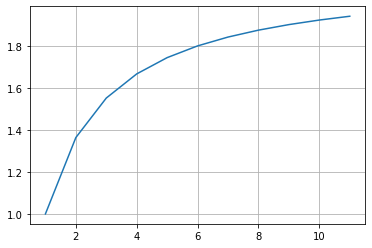

In [19]:
plt.plot(slaves, list(map(lambda x: speedup(x, S, P), slaves)))
plt.grid()

# 3) MPI parallel implementation

Here are the main parts of our parallel C++ implementation using openMPI.

### Master's side

Send the sub-text to the slaves
```
	for (int p = 1; p < size; ++p) {
			
		string subtxt = txt.substr(offset, payLoadSize);
		string message = string(subtxt)+SEPARATOR+string(pat)+"\0";
		retVal = MPI_Send(message.c_str(),  message.length() , MPI_CHAR, p, TAG, MPI_COMM_WORLD);
		offset+=payLoadSize;
	}
```

Waits for the slaves to finish and receives the occurrences count

```
	for (int p = 1; p < size; ++p){
		MPI_Recv(&result, 1, MPI_INT, p, TAG, MPI_COMM_WORLD, &status);
		results+=result;
	}
```

### Slave's side

Probe for an incoming message from master. When probe returns, the status object has the size and other attributes of the incoming message.  

```
    MPI_Status status;
    MPI_Probe(0, TAG, MPI_COMM_WORLD, &status);
	
	int messageSize; //size of the incoming string
    MPI_Get_count(&status, MPI_CHAR, &messageSize);
```

So we can get the message size  and allocate the necessary memory for the salve to store it.

```
    int numBytes = sizeof(char)*(messageSize);
	char* buf = (char*)malloc(numBytes);
```

Then it receives the "message" from the master, splits the string in sub-text and pattern. Finally proceeds with the search.

```
    retVal = MPI_Recv(buf, messageSize, MPI_CHAR, 0, TAG, MPI_COMM_WORLD, MPI_STATUS_IGNORE);

	text = strtok(buf, SEPARATOR);
	pattern = strtok(NULL, SEPARATOR);

    int result = search(text, pattern);
```

Finally, send the result to the master.
```
    retVal = MPI_Send(&result, 1, MPI_INT, 0, TAG, MPI_COMM_WORLD);
```

# 4) Testing and Debugging

For our performance tests, we used:

* <em>clock()</em>: a C++ function that returns the processor time consumed by the program, divided by CLOCKS_PER_SEC we obtain time in seconds


The data-sets used for the tests are those already mentioned:
* <em>Escherichia coli</em>: with a lenght of about 5,000,000 nitrogenous base pairs
* <em>Nostoc punctiforme</em>: with a length of about 9,000,000 nitrogenous base pairs
* <em>Apis mellifera</em>: with a total length of about 23,6000,000 nitrogenous base pairs (16 chromosomes)

On which the search is made for a gene of variable size, but typically in the order of a thousand letters (nitrogenous bases).

Our tests for both performance and program debugging are <em>automated</em> via a Python script that tests the code with different numbers of cores, with different data-sets. In particular, with the same number of cores and data-sets, three tests are carried out, ie the search for three different genes located in non-contiguous positions. 

# 5) Performance and scalibility analysis

All testing, performance, and scalability assessment, was conducted on the Google Cloud Platform. 

In particular, we created the cluster according to the "light cluster" technique consisting of 7 machines (1 master and 6 slaves). Each with 2vCores and 8GB of memory. All machines are within the same geographic region.

We also tested the program on another separate (single) machine with 16vCores, for the sake of comparison.


<img src="./images/cluster8.png" width="300" style="display: block; margin-left: auto; margin-right: auto; width: 50%;">

#### The Shape of the data collected by our scripts:
(Each row represents an experiment)

In [20]:
df = pd.read_json("./testBigOne.txt")
df.head(5)

,text_size,pattern_size,num_occurances,millisecs,genome,gene_index,num_cores,subtext_size
0,5594837,2463,1.0,58.257,e_coli,2,1,NaN
1,5594837,771,1.0,58.532,e_coli,40,1,NaN
2,5594837,699,1.0,58.766,e_coli,1234,1,NaN
3,5594837,2463,1.0,79.264,e_coli,2,2,5594837.0
4,5594837,771,1.0,78.910,e_coli,40,2,5594837.0


(In the case of our light-cluster, 'num_cores' denotes the number of machines employed in the experiment, since each of the machines provided one core to the overall computation effort).

### Analysis of the Execution Time
(Single Machine)

The following graph shows how the performance trend (execution time) varies according to the number of cores. We effectively group our data by "num_cores" and show the mean. This data was taken through our automated test launched on a single machine, with 8 cores available.

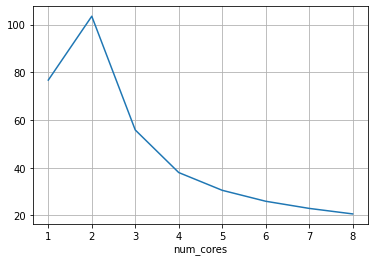

In [21]:
df.groupby( "num_cores" ).millisecs.mean().plot()
plt.grid()

The graph above shows, first and foremost, that the serial algorithm is faster than the 2-core (1 master and 1 slave) implementation, a result that we expected. 

This is due to the sheer overhead of OpenMPI, and because there is actually only one slave doing the <em>search</em>. On the other hand, when the number of slaves grows, you can see how the performance gradually improves at each new slave.

### Analysis of the speed-up
(Single Machine)

The next graph shows the performance trend, launching the automated test inside a single machine with 8 cores, in terms of speed-up. That is the ratio between the execution time of the serial algorithm and the parallel one.

In [22]:
def serialMean(row):
    """
    Computes the speedup w/ respect to the serial implementation.
    """
    means = df[df.num_cores==1].groupby("genome").millisecs.mean()
    return means[row.genome]/row.millisecs

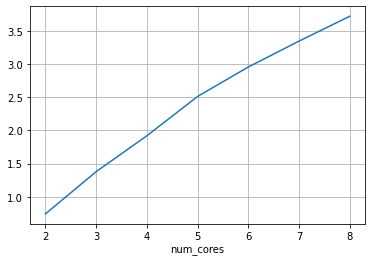

In [23]:
df["speedup"] = df.apply(serialMean,axis=1)
df[df.num_cores!=1].groupby("num_cores").speedup.mean().plot()
plt.grid()

We notice how the speed-up increases (from 3 cores and above) with the increase in the number of cores used for substring search. 
An expected result, indeed exceeding our expectations from the two a priori analyses.

### Scalability Analysis

This section shows the results related to the scalability analysis. Results made using the cluster on Google Colud Platform. We used 1 master with 6 slaves, each with 2 Vcores. Studied both strong and weak scalabilty.

In [24]:
df = pd.read_json("./test_cluster2.txt").dropna().reset_index(drop=True)

#### Strong Scalability
(Cluster)

As for strong scalability, what we expect is that by keeping the problem size the same, if the number of cores (machines / slaves) available doubles, then the execution time should be halved.

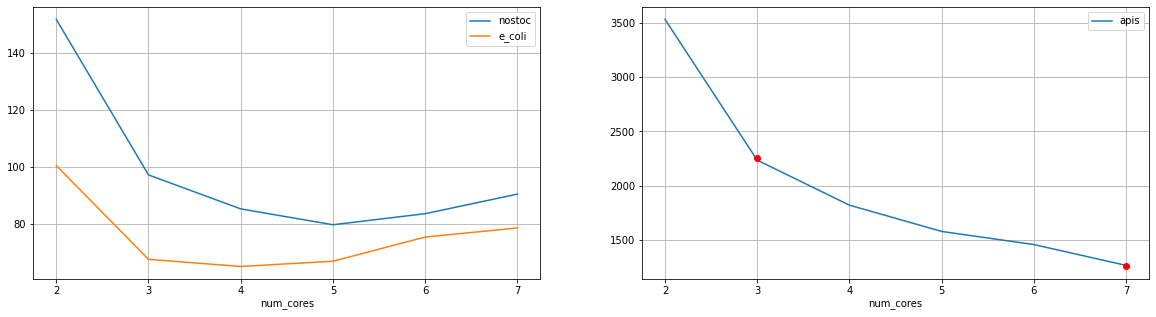

In [25]:
fig, axes = plt.subplots(ncols=2,figsize=(20,5))
df[df.genome=="nostoc"].groupby( "num_cores" ).millisecs.mean().plot(ax = axes[0])
df[df.genome=="e_coli"].groupby( "num_cores" ).millisecs.mean().plot(ax = axes[0])
df[df.genome=="apis"].groupby( "num_cores" ).millisecs.mean().plot(ax = axes[1])
axes[0].grid()
axes[1].grid()
axes[1].legend(("apis",))
axes[0].legend(("nostoc","e_coli"))
axes[1].plot(3,2253,"ro")
axes[1].plot(7,1255,"ro")

What the Apis graph shows is consistent with our expectations. For example, if we look with 4 cores (3 slaves) and with 7 cores (6 slaves), we notice how the execution **time is approximately halved**. 

On the other hand, the <em>nostoc</em> and <em>e_coli</em> graphs contradict our expectations. This can be explained by the presence of the network communication overhead (by the machines in the cluster), that it is more significant when the chunks of useful data are smaller (nostoc and e_coli). 

#### Weak Scalability
(Cluster)

For the weak scalability, data always acquired on the cluster and by launching our automated test, what we expect is that if, for example, the size of the data-set doubles and the number of cores (machines / slaves) doubles, and the sub-text analyzed by each slave remains of the same size, then execution time should remain the **same**.

*The sizes of the E. coli and N. Punctiforme datasets were artificially limited to: 4500000 and 9000000 (double as much) characters respectively for this comparison*.

In [26]:
df = pd.read_json("./test_weak_scalability.txt")

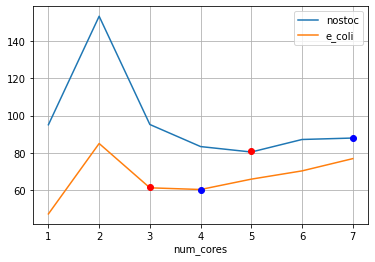

In [27]:
df[df.genome=="nostoc"].groupby( "num_cores" ).millisecs.mean().plot()
df[df.genome=="e_coli"].groupby( "num_cores" ).millisecs.mean().plot()
plt.grid()
plt.legend(("nostoc","e_coli"))
plt.plot(3,62,"ro")
plt.plot(5,81,"ro")
plt.plot(4,60,"bo")
plt.plot(7,88,"bo")

The obtained results are not consistent with our expectations. The data-set doubled, the number of cores (slaves) doubled but the execution **time changed**. This is due to the network communication overhead, the same reason above.

#### Weak Scalability
( Single Machine)

We tried, the same <em>weak</em> scalabilty test, but inside a single machine with 16 Vcores.

In [28]:
df = pd.read_json("./test_weak_scalability_single_machine.txt")

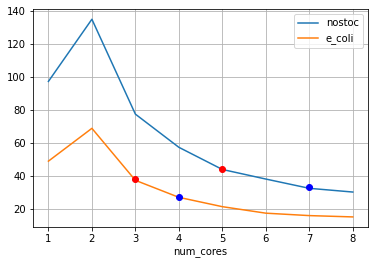

In [29]:
df[df.genome=="nostoc"].groupby( "num_cores" ).millisecs.mean().plot()
df[df.genome=="e_coli"].groupby( "num_cores" ).millisecs.mean().plot()
plt.grid()
plt.legend(("nostoc","e_coli"))
plt.plot(3,38,"ro")
plt.plot(5,44,"ro")
plt.plot(4,27,"bo")
plt.plot(7,33,"bo")

The results above are closer to our expectations. The size of the data-set doubled, the number of cores (slaves) doubled and the time is **almost the same**. The difference from before is the absence of the network communication overhead (in a single machine).

## 6) Conlusion

A small final table showing the contribution of both to the project.

<table style="display: block; margin-left: auto; margin-right: auto; width: 50%;">
    <tr>
        <th>Topic</th>
        <th>Davide Pio Lotito</th>
        <th>Aiman Al Masoud</th>
  </tr>
  <tr>
        <td>A-priori study</td>
        <td>50%</td>
        <td>50%</td>
  </tr>
  <tr>
        <td>C++ code</td>
        <td>50%</td>
        <td>50%</td>
  </tr>
  </tr>
        <tr>
        <td>openMPI</td>
        <td>40%</td>
        <td>60%</td>
  </tr>
  <tr>
        <td>Automated test script</td>
        <td>30%</td>
        <td>70%</td>
  </tr>
  <tr>
        <td>Performance and scalability</td>
        <td>60%</td>
        <td>40%</td>
  </tr>
  <tr>
        <td>Google Colud Platform</td>
        <td>70%</td>
        <td>30%</td>
  </tr>
  <tr>
        <td>Jupyter notebook for the final report</td>
        <td>50%</td>
        <td>50%</td>
  </tr> 
</table> 